In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
clinical = pd.read_csv('clinical_dataset.csv', delimiter = ";")
clinical.head(5)

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,Non frail,F,75,0,0,No,Sees moderately,Hears well,No,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5,0,5
1,1002,Pre-frail,M,73,0,1,No,Sees moderately,Hears moderately,No,...,2 - A little worse,3.3,> 2 h and < 5 h per week,Never smoked,14.0,6.0,26.0,12,0,4
2,1003,Pre-frail,M,72,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9,0,3
3,1004,Frail,F,88,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,7.3,< 2 h per week,Never smoked,21.0,5.5,20.0,11,0,8
4,1005,Pre-frail,F,83,0,4,Yes,Sees moderately,Hears poorly,No,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12,0,4


In [3]:
beacons = pd.read_csv('beacons_cleared.csv', delimiter=',')
beacons.head(5)

,part_id,Bedroom,Bathroom,Kitchen,Livingroom
0,1001,14.3,2.9,11.5,26.7
1,1003,0.0,3.5,2.7,77.0
2,1005,0.0,0.0,0.0,54.3
3,1006,9.9,37.6,31.2,10.7
4,1007,9.7,0.7,74.8,9.9


In [4]:
merged_dataset = pd.merge(left=beacons, right=clinical, how='left', left_on='part_id', right_on='part_id')
merged_dataset.head()

,part_id,Bedroom,Bathroom,Kitchen,Livingroom,fried,gender,age,hospitalization_one_year,hospitalization_three_years,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,14.3,2.9,11.5,26.7,Non frail,F,75.0,0.0,0.0,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5.0,0.0,5.0
1,1003,0.0,3.5,2.7,77.0,Pre-frail,M,72.0,0.0,0.0,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9.0,0.0,3.0
2,1005,0.0,0.0,0.0,54.3,Pre-frail,F,83.0,0.0,4.0,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12.0,0.0,4.0
3,1006,9.9,37.6,31.2,10.7,Non frail,M,72.0,0.0,1.0,...,3 - About the same,0.0,> 2 h and < 5 h per week,Never smoked,7.0,6.0,28.0,5.0,0.0,6.0
4,1007,9.7,0.7,74.8,9.9,Non frail,F,70.0,0.0,0.0,...,3 - About the same,2.4,> 2 h and < 5 h per week,Current smoker,0.0,6.0,31.0,4.0,0.0,2.0


In [5]:
merged_dataset.describe()

,part_id,Bedroom,Bathroom,Kitchen,Livingroom,age,hospitalization_one_year,hospitalization_three_years,exhaustion_score,raise_chair_time,...,social_text,stairs_number,life_quality,pain_perception,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
count,292.000000,292.000000,292.000000,292.000000,292.000000,281.000000,281.000000,281.000000,281.000000,281.000000,...,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,2289.421233,11.522945,3.916781,24.176027,29.351027,76.103203,0.291815,0.601423,1.217082,34.150534,...,36.213523,5.601423,7.925267,2.914413,7.300267,5.889680,28.434164,4.263345,0.338078,3.957295
std,785.919583,16.770613,11.921990,26.650514,28.995557,5.239959,1.072499,2.034839,0.412994,142.837821,...,166.259986,8.979612,1.668201,2.228880,59.810513,0.235888,4.019165,2.755846,0.808178,3.070300
min,124.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,1.000000,5.700000,...,0.000000,0.000000,2.000000,0.000000,0.000000,4.500000,11.000000,0.000000,0.000000,0.000000
25%,2019.250000,0.000000,0.000000,3.400000,3.600000,71.000000,0.000000,0.000000,1.000000,10.200000,...,0.000000,0.000000,7.000000,1.000000,0.000000,6.000000,27.000000,2.000000,0.000000,2.000000
50%,2112.500000,3.600000,0.250000,13.700000,22.150000,76.000000,0.000000,0.000000,1.000000,12.580000,...,0.000000,1.000000,8.000000,2.400000,1.000000,6.000000,31.000000,4.000000,0.000000,3.000000
75%,3058.500000,16.950000,2.600000,37.725000,45.650000,79.000000,0.000000,1.000000,1.000000,15.000000,...,7.000000,9.000000,9.000000,4.300000,3.000000,6.000000,31.000000,6.000000,0.000000,6.000000
max,3611.000000,85.800000,100.000000,100.000000,100.000000,93.000000,15.000000,30.000000,2.000000,999.000000,...,999.000000,52.000000,10.000000,9.200000,999.000000,6.000000,31.000000,14.000000,7.000000,16.000000


In [6]:
total_entries = merged_dataset.shape[0]
total_entries

292

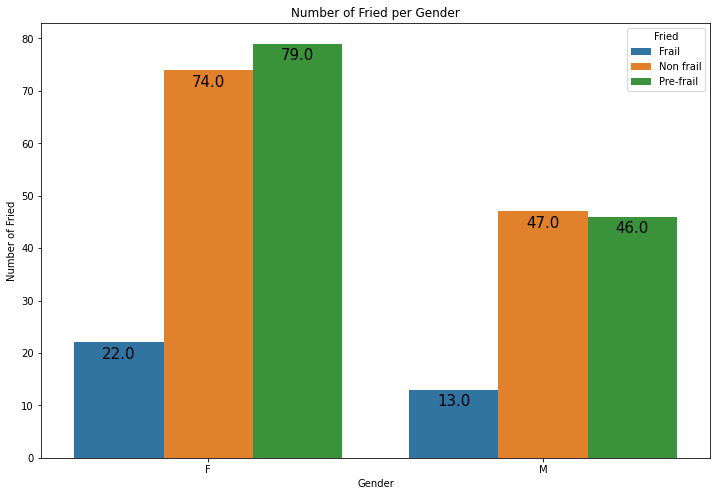

In [7]:
grouped_values = merged_dataset.groupby(['gender','fried']).count().reset_index()
fig, ax = plt.subplots(figsize=(12,8))
plot1 = sns.barplot(x = 'gender', y = 'part_id', data=grouped_values, hue= 'fried', ax=ax)
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xlabel('Gender')
plt.ylabel('Number of Fried')
plt.title('Number of Fried per Gender')
plt.legend(title= 'Fried')
plt.show()


In [8]:
grouped_values = merged_dataset.groupby(['fried']).sum().reset_index()
grouped_values

,fried,part_id,Bedroom,Bathroom,Kitchen,Livingroom,age,hospitalization_one_year,hospitalization_three_years,exhaustion_score,...,social_text,stairs_number,life_quality,pain_perception,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,Frail,73311,479.3,76.4,922.0,1004.1,2697.0,23.0,49.0,63.0,...,1034.0,119.0,270.3,138.30,50.750,207.0,965.0,156.0,13.0,130.0
1,Non frail,297582,1069.7,350.2,2518.1,3718.2,9112.0,19.0,41.0,121.0,...,3419.0,879.0,975.1,283.55,587.250,710.5,3461.0,459.0,27.0,432.0
2,Pre-frail,277927,1643.1,531.8,3327.1,3580.8,9576.0,40.0,79.0,158.0,...,5723.0,576.0,981.6,397.10,1413.375,737.5,3564.0,583.0,55.0,550.0


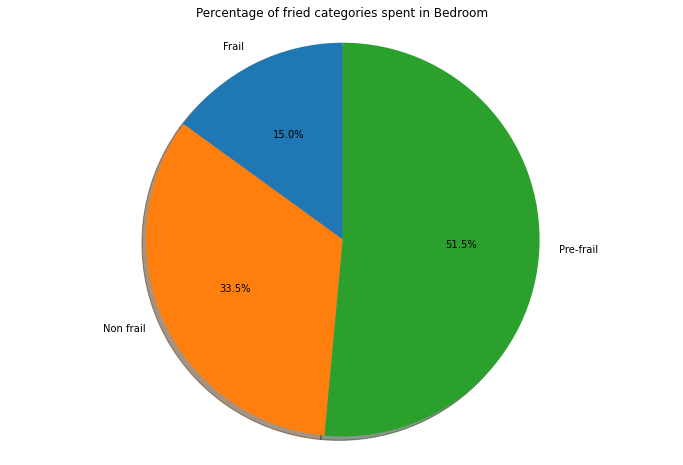

In [9]:
fig, ax = plt.subplots(figsize=(12,8), facecolor = 'white')
ax.pie(grouped_values['Bedroom'], labels=grouped_values['fried'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of fried categories spent in Bedroom')
plt.show()

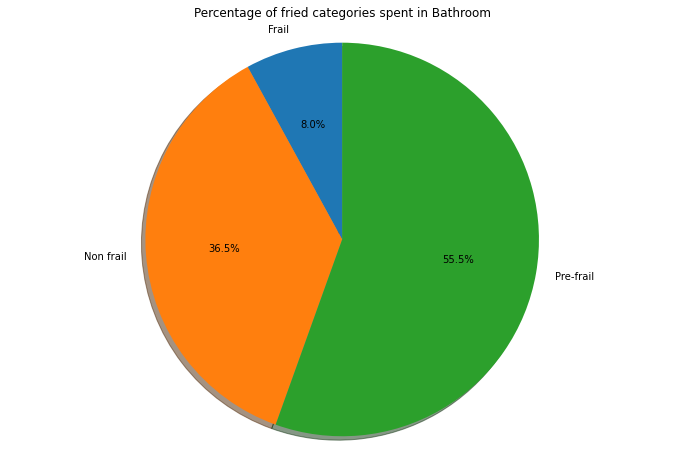

In [10]:
fig, ax = plt.subplots(figsize=(12,8), facecolor = 'white')
ax.pie(grouped_values['Bathroom'], labels=grouped_values['fried'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of fried categories spent in Bathroom')
plt.show()

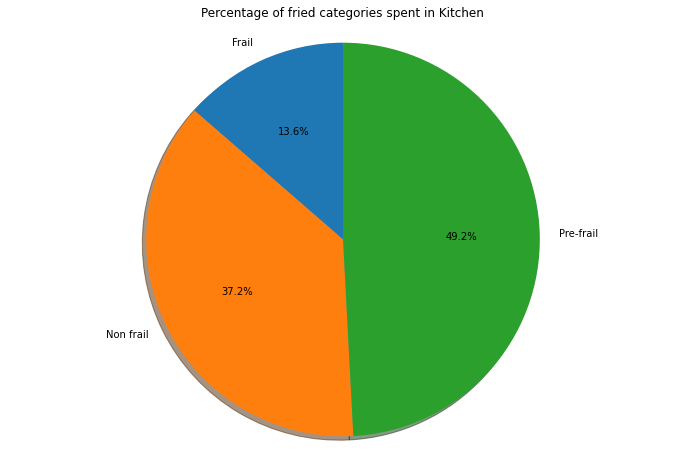

In [11]:
fig, ax = plt.subplots(figsize=(12,8), facecolor = 'white')
ax.pie(grouped_values['Kitchen'], labels=grouped_values['fried'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of fried categories spent in Kitchen')
plt.show()

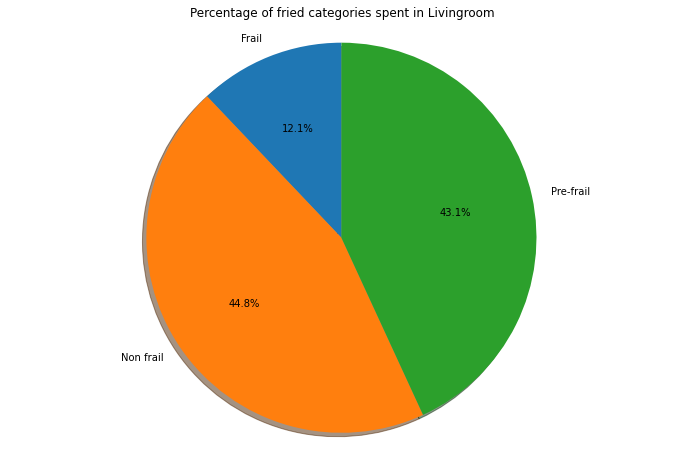

In [12]:
fig, ax = plt.subplots(figsize=(12,8), facecolor= 'white')
ax.pie(grouped_values['Livingroom'], labels=grouped_values['fried'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of fried categories spent in Livingroom')
plt.show()

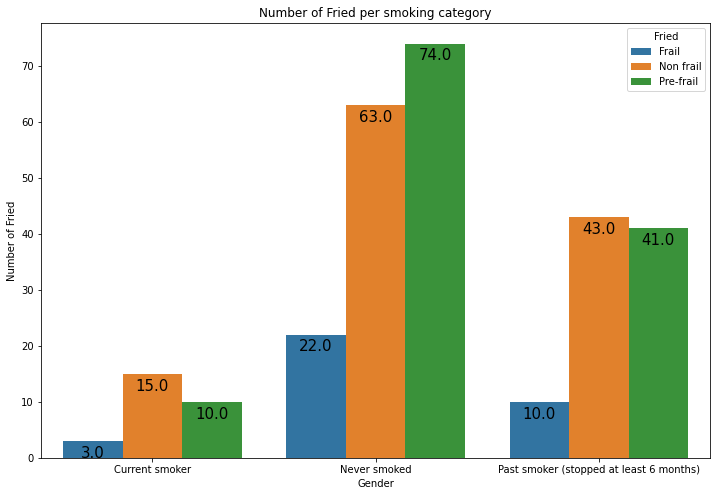

In [13]:
grouped_values = merged_dataset.groupby(['smoking', 'fried']).count().reset_index()
fig, ax = plt.subplots(figsize=(12,8))
plot1 = sns.barplot(x = 'smoking', y = 'part_id', data=grouped_values, hue= 'fried', ax=ax)
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xlabel('Gender')
plt.ylabel('Number of Fried')
plt.title('Number of Fried per smoking category')
plt.legend(title= 'Fried')
plt.show()


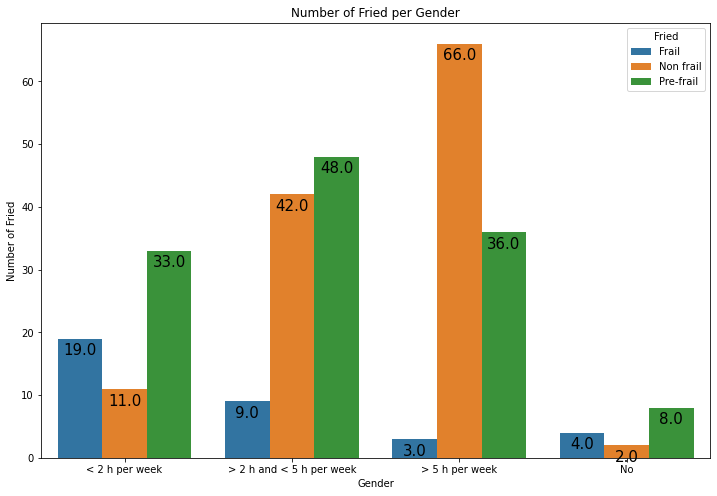

In [14]:
grouped_values = merged_dataset.groupby(['activity_regular', 'fried']).count().reset_index()
fig, ax = plt.subplots(figsize=(12,8))
plot1 = sns.barplot(x = 'activity_regular', y = 'part_id', data=grouped_values, hue= 'fried', ax=ax)
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xlabel('Gender')
plt.ylabel('Number of Fried')
plt.title('Number of Fried per Gender')
plt.legend(title= 'Fried')
plt.show()